<a href="https://colab.research.google.com/github/rayhanfaris17/travel_insurance_customer/blob/main/Travel_Insurance_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

In [ ]:
# Membaca Dataset
df = pd.read_excel('TravelInsurance.xlsx')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [ ]:
# Untuk mengetahui tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
#Mengecek data yang kosong
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
# Mengecek duplikat pada dataset
df.duplicated().sum()

0

# **Data Preprocessing**

In [ ]:
# Mengubah data kategorikal ke numerikal
df['Employment Type'] = df['Employment Type'].map({'Government Sector': 1, 'Private Sector/Self Employed': 0})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int64
 3   GraduateOrNot        1987 non-null   int64
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int64
 8   EverTravelledAbroad  1987 non-null   int64
 9   TravelInsurance      1987 non-null   int64
dtypes: int64(10)
memory usage: 155.4 KB


In [ ]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,0,1,1500000,4,0,1,1,1
1983,1983,28,0,1,1750000,5,1,0,1,0
1984,1984,28,0,1,1150000,6,1,0,0,0
1985,1985,34,0,1,1000000,6,0,1,1,1


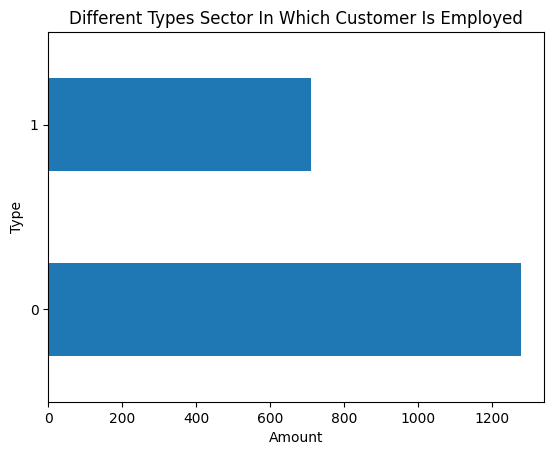

In [ ]:
df['TravelInsurance'].value_counts().plot(kind='barh')
plt.xlabel('Amount')
plt.ylabel('Type')
plt.title('Different Types Sector In Which Customer Is Employed')
plt.show()

# **Data Normalization**
Metode normalisasi yang digunakan adalah Standard Scaler

In [ ]:
# Memisahkan label dengan data target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_df = pd.DataFrame(X, columns=df.iloc[:,:-1].columns)
X_scaled = pd.DataFrame(X)

In [ ]:
# Hasil data yang sudah di normalisasi dengan standard scaler
X_df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,-1.731179,0.463430,1.576694,0.417552,-1.414061,0.774964,1.612339,-0.515369,-0.486277
1,-1.729436,0.463430,-0.634238,0.417552,0.842012,1.396373,-0.620217,-0.515369,-0.486277
2,-1.727693,1.493446,-0.634238,0.417552,-1.148641,-0.467855,1.612339,-0.515369,-0.486277
3,-1.725949,-0.566587,-0.634238,0.417552,-0.617800,-1.089265,1.612339,-0.515369,-0.486277
4,-1.724206,-0.566587,-0.634238,0.417552,-0.617800,2.017783,1.612339,1.940358,-0.486277
...,...,...,...,...,...,...,...,...,...
1982,1.724206,1.150107,-0.634238,0.417552,1.505563,-0.467855,-0.620217,1.940358,2.056440
1983,1.725949,-0.566587,-0.634238,0.417552,2.169114,0.153554,1.612339,-0.515369,2.056440
1984,1.727693,-0.566587,-0.634238,0.417552,0.576591,0.774964,1.612339,-0.515369,-0.486277
1985,1.729436,1.493446,-0.634238,0.417552,0.178461,0.774964,-0.620217,1.940358,2.056440


In [ ]:
X

array([[-1.73117934,  0.4634296 ,  1.5766943 , ...,  1.6123392 ,
        -0.51536889, -0.48627715],
       [-1.72943595,  0.4634296 , -0.63423836, ..., -0.62021689,
        -0.51536889, -0.48627715],
       [-1.72769257,  1.49344596, -0.63423836, ...,  1.6123392 ,
        -0.51536889, -0.48627715],
       ...,
       [ 1.72769257, -0.56658675, -0.63423836, ...,  1.6123392 ,
        -0.51536889, -0.48627715],
       [ 1.72943595,  1.49344596, -0.63423836, ..., -0.62021689,
         1.9403577 ,  2.05644046],
       [ 1.73117934,  1.49344596, -0.63423836, ..., -0.62021689,
        -0.51536889, -0.48627715]])

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

# **Train Test Split**
Pada tahap ini data akan dipecah menjadi 2 bagian. Yang pertama merupakan data train, yang nantinya data tersebut akan di latih oleh model yang akan digunakan. Lalu yang kedua adalah data test, yang mana data ini akan diuji untuk menemukan hasil akurasinya. Persentase data test yang akan digunakan adalah 20% dari keseluruhan data.

In [ ]:
X_train, X_test , y_train , y_test = train_test_split (X_scaled, y, test_size = 0.2, random_state =0)

In [ ]:
# ignore warning
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

# **Build Model and Cross Validation**
Di tahap ini adalah prooses pembuatan pipeline untuk algoritma yang akan digunakan. Setelah itu akan dilakukkan cross validation menggunakan K-Fold dengan jumlah split sebesar 10.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection

# pembuatan model
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('Neural Network', MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1, hidden_layer_sizes=(5,2))))

results = []
names = []

# cross validation using K-Fold
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=5, shuffle=True)
  cv_res = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  print(cv_res)
  results.append(cv_res)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_res.mean(), cv_res.std())
  print(msg)

[0.68553459 0.68553459 0.72955975 0.77358491 0.76100629 0.77987421
 0.76100629 0.70440252 0.7672956  0.80379747]
Naive Bayes: 0.745160 (0.039317)
[0.76100629 0.75471698 0.81761006 0.79874214 0.87421384 0.85534591
 0.80503145 0.76100629 0.81132075 0.84177215]
SVM: 0.808077 (0.039013)
[0.69811321 0.72955975 0.78616352 0.74842767 0.83018868 0.79874214
 0.77358491 0.67924528 0.77358491 0.81012658]
KNN: 0.762774 (0.046183)
[0.73584906 0.77358491 0.79874214 0.78616352 0.8490566  0.83018868
 0.80503145 0.75471698 0.80503145 0.82911392]
Neural Network: 0.796748 (0.033417)


Berikut adalah boxplot hasil cross validation sebanyak 10 kali. Dan bisa dilihat bahwa Support Virtual Machine memiliki akurasi yang tinggi jika dibandingkan dengan algoritma lainnya.

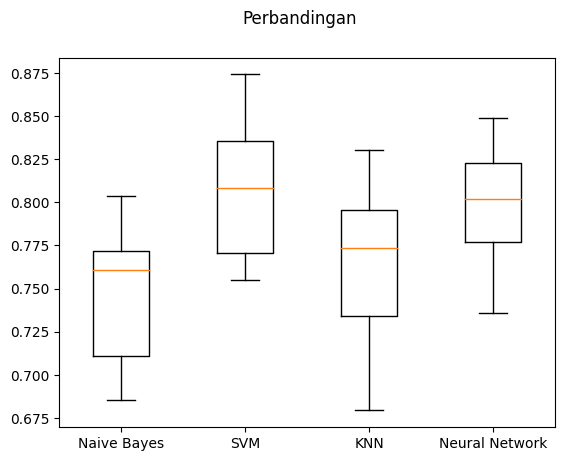

In [ ]:
fig = plt.figure()
fig.suptitle('Perbandingan')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Naive Bayes :
Accuracy:  0.7462311557788944


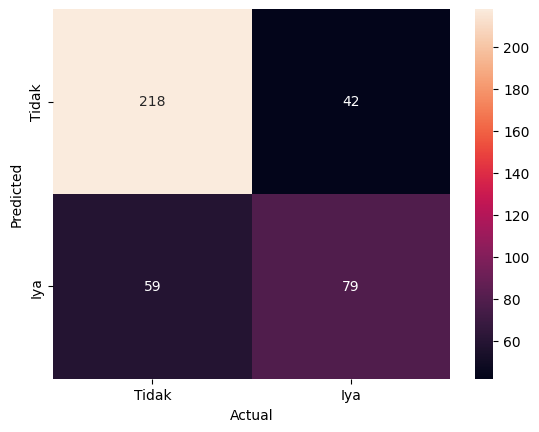

Precision:  0.6528925619834711
Recall:  0.572463768115942
F1:  0.61003861003861
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       260
           1       0.65      0.57      0.61       138

    accuracy                           0.75       398
   macro avg       0.72      0.71      0.71       398
weighted avg       0.74      0.75      0.74       398

SVM :
Accuracy:  0.8090452261306532


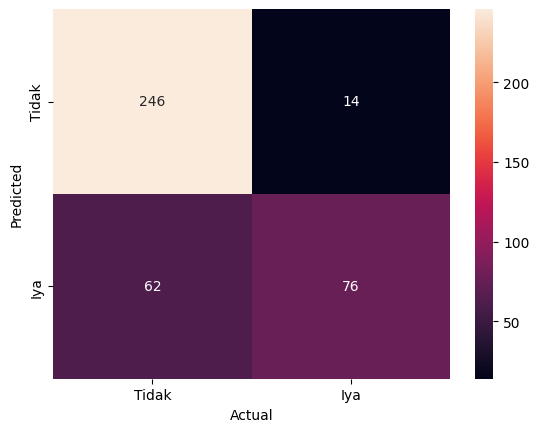

Precision:  0.8444444444444444
Recall:  0.5507246376811594
F1:  0.6666666666666667
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       260
           1       0.84      0.55      0.67       138

    accuracy                           0.81       398
   macro avg       0.82      0.75      0.77       398
weighted avg       0.81      0.81      0.80       398

KNN :
Accuracy:  0.7788944723618091


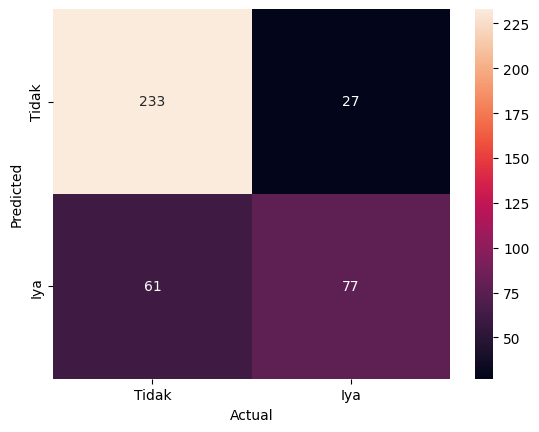

Precision:  0.7403846153846154
Recall:  0.5579710144927537
F1:  0.6363636363636365
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       260
           1       0.74      0.56      0.64       138

    accuracy                           0.78       398
   macro avg       0.77      0.73      0.74       398
weighted avg       0.77      0.78      0.77       398

Neural Network :
Accuracy:  0.7864321608040201


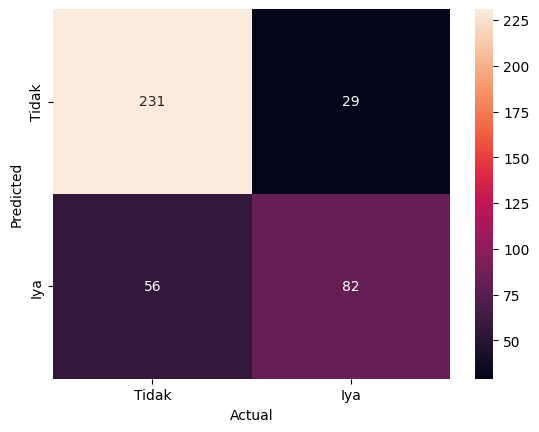

Precision:  0.7387387387387387
Recall:  0.5942028985507246
F1:  0.6586345381526104
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       260
           1       0.74      0.59      0.66       138

    accuracy                           0.79       398
   macro avg       0.77      0.74      0.75       398
weighted avg       0.78      0.79      0.78       398



In [ ]:
# proses uji data untuk setiap algoritma yang digunakan dan mencari akurasi, precision, recall, dan f1-scorenya
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(name, ":")
  print('Accuracy: ', accuracy_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Tidak', 'Iya'], yticklabels=['Tidak', 'Iya'])
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()
  print('Precision: ', precision_score(y_test, y_pred))
  print('Recall: ', recall_score(y_test, y_pred))
  print('F1: ',  f1_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))